### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('SBAnational.csv',low_memory=False)
pd.set_option('display.max_columns', None)
df.head()
#source data = https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [4]:
#Change the ApprovalDate, ChgOffDate, DisbursementDate column to datetime
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [5]:
#Mengubah kolom DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv menjadi float
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]=df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.replace('$', '').replace(',', ''))
df=df.astype({'DisbursementGross':'float', 'BalanceGross':'float', 'ChgOffPrinGr':'float', 'GrAppv':'float', 'SBA_Appv':'float'})
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [6]:
for i in ['ApprovalFY','NewExist','UrbanRural','RevLineCr','LowDoc'] : 
    print(i)
    print(df[i].unique() )
    

ApprovalFY
['1997' '1980' '2006' '1998' '1999' '2000' '2001' '1972' '2003' '2004'
 '1978' '1979' '1981' '2005' '1962' '1982' '1965' '1966' '1983' '1973'
 '1984' '2007' '1985' '1986' '1987' '2008' '1988' '2009' '1989' '1991'
 '1990' '1974' '2010' '1967' '2011' '1992' '1993' '2002' '2012' '2013'
 '1994' '2014' '1975' '1977' '1976' '1968' '1976A' '1969' '1995' '1970'
 '1996' '1971']
NewExist
[ 2.  1.  0. nan]
UrbanRural
[0 1 2]
RevLineCr
['N' '0' 'Y' 'T' nan '`' ',' '1' 'C' '3' '2' 'R' '7' 'A' '5' '.' '4' '-'
 'Q']
LowDoc
['Y' 'N' 'C' '1' nan 'S' 'R' 'A' '0']


In [7]:
#Cleaning 'ApprovalFY'
def clean_str(x):
    if isinstance(x,str):
        return x.replace('A','')
    return x
df['ApprovalFY']=df['ApprovalFY'].apply(clean_str).astype('int')
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    899164
Name: ApprovalFY, dtype: int64

In [8]:
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, 1969, 1995, 1970, 1996, 1971])

In [9]:
df['NewExist'].value_counts()

1.0    644869
2.0    253125
0.0      1034
Name: NewExist, dtype: int64

In [10]:
#Drop rows in Column 'NewExist' that has value = 0 (based on paper)
df= df[df['NewExist']!=0]

In [11]:
df['NewExist'].value_counts()

1.0    644869
2.0    253125
Name: NewExist, dtype: int64

In [12]:
df['RevLineCr'].value_counts()

N    419352
0    257546
Y    201365
T     15278
1        22
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

In [13]:
df=df[df['RevLineCr'].isin(['N','0','Y','1']) ]
df['RevLineCr'] = df['RevLineCr'].map(lambda x: 'N' if x=='0' else
                                      'Y' if x=='1' else x)
      

In [14]:
df['RevLineCr'].value_counts()

N    676898
Y    201387
Name: RevLineCr, dtype: int64

In [15]:
df['LowDoc'].value_counts()

N    764567
Y    108028
0      1239
C       752
S       600
A       493
R        74
1         1
Name: LowDoc, dtype: int64

In [16]:
df=df[df['LowDoc'].isin(['N','Y']) ]

In [17]:
df['LowDoc'].value_counts()

N    764567
Y    108028
Name: LowDoc, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872595 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      872595 non-null  int64         
 1   Name               872582 non-null  object        
 2   City               872565 non-null  object        
 3   State              872582 non-null  object        
 4   Zip                872595 non-null  int64         
 5   Bank               871049 non-null  object        
 6   BankState          871042 non-null  object        
 7   NAICS              872595 non-null  int64         
 8   ApprovalDate       872595 non-null  datetime64[ns]
 9   ApprovalFY         872595 non-null  int32         
 10  Term               872595 non-null  int64         
 11  NoEmp              872595 non-null  int64         
 12  NewExist           872464 non-null  float64       
 13  CreateJob          872595 non-null  int64   

### Handling Missing Value 

In [19]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     13
City                     30
State                    13
Zip                       0
Bank                   1546
BankState              1553
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                131
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           718486
DisbursementDate       2232
DisbursementGross         0
BalanceGross              0
MIS_Status             1930
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

#missing values in percentage

In [20]:
round(df.isnull().sum()/len(df)*100, 2)

LoanNr_ChkDgt         0.00
Name                  0.00
City                  0.00
State                 0.00
Zip                   0.00
Bank                  0.18
BankState             0.18
NAICS                 0.00
ApprovalDate          0.00
ApprovalFY            0.00
Term                  0.00
NoEmp                 0.00
NewExist              0.02
CreateJob             0.00
RetainedJob           0.00
FranchiseCode         0.00
UrbanRural            0.00
RevLineCr             0.00
LowDoc                0.00
ChgOffDate           82.34
DisbursementDate      0.26
DisbursementGross     0.00
BalanceGross          0.00
MIS_Status            0.22
ChgOffPrinGr          0.00
GrAppv                0.00
SBA_Appv              0.00
dtype: float64

In [21]:
df=df.drop('ChgOffDate',axis=1)

In [22]:
df=df.dropna()

In [23]:
round(df.isnull().sum()/len(df)*100, 2)

LoanNr_ChkDgt        0.0
Name                 0.0
City                 0.0
State                0.0
Zip                  0.0
Bank                 0.0
BankState            0.0
NAICS                0.0
ApprovalDate         0.0
ApprovalFY           0.0
Term                 0.0
NoEmp                0.0
NewExist             0.0
CreateJob            0.0
RetainedJob          0.0
FranchiseCode        0.0
UrbanRural           0.0
RevLineCr            0.0
LowDoc               0.0
DisbursementDate     0.0
DisbursementGross    0.0
BalanceGross         0.0
MIS_Status           0.0
ChgOffPrinGr         0.0
GrAppv               0.0
SBA_Appv             0.0
dtype: float64

In [24]:
print(len(df))

866934


### Handling Outliers

In [25]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,8.669340e+05,866934.000000,866934.000000,866934.000000,866934.000000,866934.000000,866934.000000,866934.000000,866934.000000,866934.000000,866934.000000,8.669340e+05,866934.000000,8.669340e+05,8.669340e+05,8.669340e+05
mean,4.772079e+09,53965.987331,397960.600616,2001.090811,111.611261,11.479845,1.282393,8.581047,10.939501,2797.338732,0.755730,2.035405e+05,3.037897,1.356226e+04,1.953500e+05,1.516626e+05
std,2.537247e+09,31137.821802,264073.664070,5.901604,79.217804,74.730555,0.450164,239.342554,239.807148,12853.281628,0.647862,2.885476e+05,1467.984331,6.593853e+04,2.845667e+05,2.290702e+05
min,1.000014e+09,0.000000,0.000000,1969.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000,0.000000e+00,1.000000e+03,5.000000e+02
25%,2.591277e+09,27893.000000,235110.000000,1997.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.400000e+04,0.000000,0.000000e+00,3.500000e+04,2.250000e+04
50%,4.360994e+09,55428.000000,445310.000000,2002.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.400000e+04,6.375000e+04
75%,6.881862e+09,83709.000000,561740.000000,2006.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.410000e+05,0.000000,0.000000e+00,2.300000e+05,1.777500e+05
max,9.996003e+09,99999.000000,928120.000000,2014.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.144632e+07,996262.000000,3.512596e+06,5.000000e+06,4.500000e+06


<AxesSubplot:>

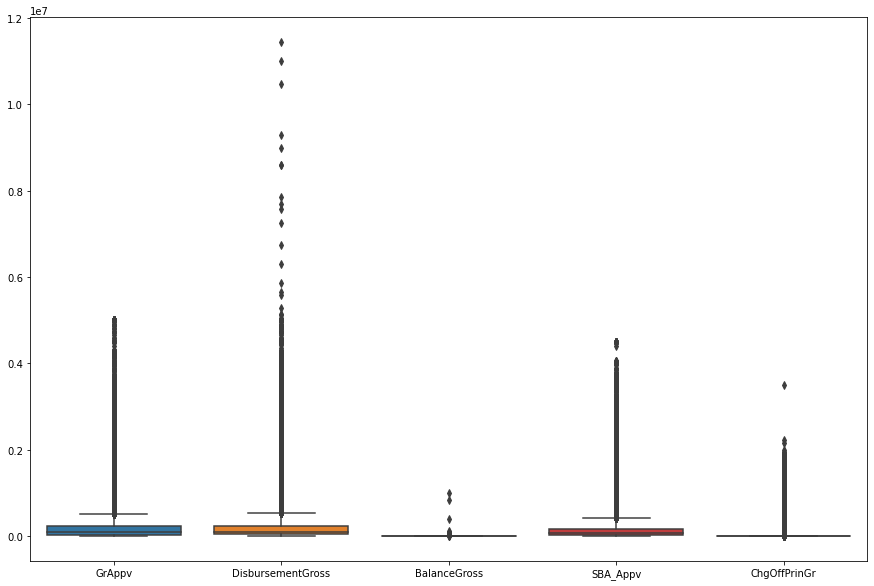

In [26]:
col_boxplot1 = ['GrAppv','DisbursementGross','BalanceGross',
               'SBA_Appv','ChgOffPrinGr']
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[col_boxplot1])

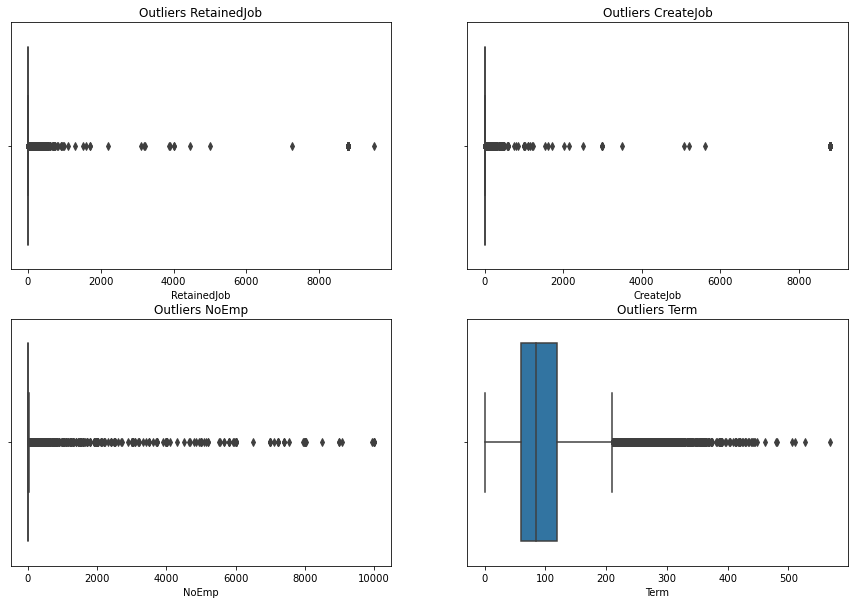

In [27]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(x =df['RetainedJob'])
plt.title('Outliers RetainedJob')

plt.subplot(222)
sns.boxplot(x =df['CreateJob'])
plt.title('Outliers CreateJob')

plt.subplot(223)
sns.boxplot(x =df['NoEmp'])
plt.title('Outliers NoEmp');

plt.subplot(224)
sns.boxplot(x =df['Term'])
plt.title('Outliers Term');


In [28]:
df=df[ df["GrAppv"]<=5000000] #based on sba website

In [29]:
df.shape

(866934, 26)

In [30]:
df=df[ df["DisbursementGross"]<=5000000] #vased on sba website

In [31]:
df.shape

(866914, 26)


Outliers from Colomn `RetainedJob` & `CreateJob` cannot be drop because any company could fill the number for loan application because there's no rules regarding the numbers of the employee


In [32]:
df=df[ df['Term']<=300] #based on sba website

In [33]:
df.shape

(863849, 26)

In [34]:
df=df[ df['NoEmp']<=1500] #based on sba website
df=df[ df['NoEmp']!=1500] #considered as error

In [35]:
df.shape

(863657, 26)

### Exploratory Data Analysis

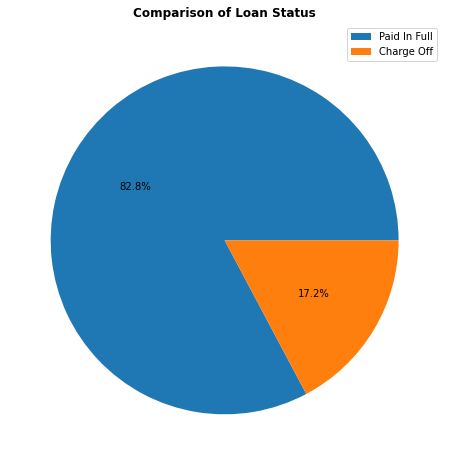

In [182]:
fig = plt.figure(figsize=(10,8))
plt.pie(pd.Series(df['MIS_Status']).value_counts(), autopct='%1.1f%%')
plt.title('Comparison of Loan Status', color='black',fontsize=12,fontweight='bold')
plt.legend(['Paid In Full','Charge Off'])

In [36]:
df_ex1=df.groupby(['MIS_Status','NewExist']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_ex2=df.groupby(['MIS_Status']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_ex = df_ex1.merge(df_ex2, on = 'MIS_Status', how = 'inner')
df_ex = df_ex.rename(columns = {'LoanNr_ChkDgt_x':'Total_Cats', 'LoanNr_ChkDgt_y': 'Total'})
df_ex[['NewExist', 'MIS_Status', 'Total_Cats', 'Total']]
df_ex['Percentage'] = round(df_ex['Total_Cats']/df_ex['Total']*100, 2)
df_ex = df_ex[['NewExist', 'MIS_Status', 'Total_Cats', 'Total', 'Percentage']]
df_ex['NewExist'] =  df_ex['NewExist'].map(lambda x : 'Existing' if x == 1 else 'New Business')
df_ex

,NewExist,MIS_Status,Total_Cats,Total,Percentage
0,Existing,P I F,515881,714891,72.16
1,New Business,P I F,199010,714891,27.84
2,Existing,CHGOFF,103773,148766,69.76
3,New Business,CHGOFF,44993,148766,30.24


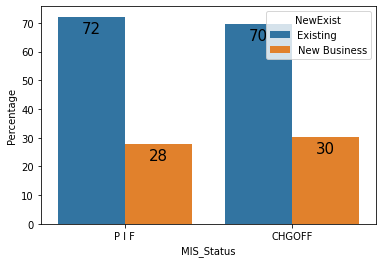

In [37]:
ax1 = sns.barplot(x='MIS_Status', y='Percentage', data=df_ex, hue='NewExist', ci=None)

for p in ax1.patches:
  ax1.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

Only slight difference between percentage of loan which is from new business applicant or existing business applicant in each population of charged-off- status and paid in full- status.

In [38]:
df_ur1=df.groupby(['MIS_Status','UrbanRural']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_ur2=df.groupby(['MIS_Status']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_ur = df_ur1.merge(df_ur2, on = 'MIS_Status', how = 'inner')
df_ur = df_ur.rename(columns = {'LoanNr_ChkDgt_x':'Total_Cats', 'LoanNr_ChkDgt_y': 'Total'})
df_ur[['UrbanRural', 'MIS_Status', 'Total_Cats', 'Total']]
df_ur['Percentage'] = round(df_ur['Total_Cats']/df_ur['Total']*100, 2)
df_ur = df_ur[['UrbanRural', 'MIS_Status', 'Total_Cats', 'Total', 'Percentage']]
df_ur['UrbanRural'] =  df_ur['UrbanRural'].map(lambda x : 'Undefined' if x == 0 else 
                                               'Urban' if x == 1 else 'Rural')
df_ur

,UrbanRural,MIS_Status,Total_Cats,Total,Percentage
0,Urban,P I F,342418,714891,47.90
1,Undefined,P I F,289641,714891,40.52
2,Rural,P I F,82832,714891,11.59
3,Urban,CHGOFF,107576,148766,72.31
4,Undefined,CHGOFF,22302,148766,14.99
5,Rural,CHGOFF,18888,148766,12.70


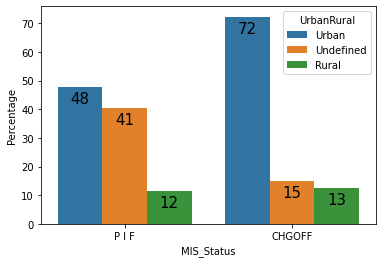

In [39]:
ax2 = sns.barplot(x='MIS_Status', y='Percentage', data=df_ur, hue='UrbanRural', ci=None)

for p in ax2.patches:
  ax2.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

Percentage of loan which is from urban applicants is lower in population of charged-off- status.

In [191]:
#Trends of charged off status based on Approval Year
df_co = df[df['MIS_Status'] == 'CHGOFF'].groupby(['ApprovalFY']).agg({'LoanNr_ChkDgt' : 'nunique'})
df_co

,LoanNr_ChkDgt
ApprovalFY,
1970,4
1971,17
1972,20
1973,41
1974,37
1975,25
1976,72
1977,123
1978,219


In [40]:
df_rev1=df.groupby(['MIS_Status','RevLineCr']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_rev2=df.groupby(['MIS_Status']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_rev = df_rev1.merge(df_rev2, on = 'MIS_Status', how = 'inner')
df_rev = df_rev.rename(columns = {'LoanNr_ChkDgt_x':'Total_Cats', 'LoanNr_ChkDgt_y': 'Total'})
df_rev[['RevLineCr', 'MIS_Status', 'Total_Cats', 'Total']]
df_rev['Percentage'] = round(df_rev['Total_Cats']/df_rev['Total']*100, 2)
df_rev = df_rev[['RevLineCr', 'MIS_Status', 'Total_Cats', 'Total', 'Percentage']]
df_rev['RevLineCr'] =  df_rev['RevLineCr'].map(lambda x : 'No' if x == 'N' else 'Yes')
df_rev

,RevLineCr,MIS_Status,Total_Cats,Total,Percentage
0,No,P I F,567553,714891,79.39
1,Yes,P I F,147338,714891,20.61
2,No,CHGOFF,98073,148766,65.92
3,Yes,CHGOFF,50693,148766,34.08


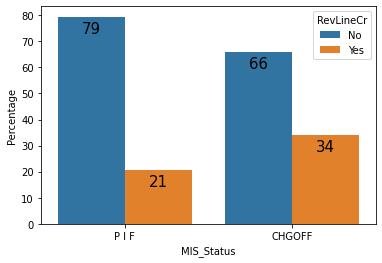

In [41]:
ax3 = sns.barplot(x='MIS_Status', y='Percentage', data=df_rev, hue='RevLineCr', ci=None)

for p in ax3.patches:
  ax3.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

Percentage of loan which is revolving line credit program is higher in population of charged-off- status.

In [42]:
df_ld1=df.groupby(['MIS_Status','LowDoc']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_ld2=df.groupby(['MIS_Status']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_ld = df_ld1.merge(df_ld2, on = 'MIS_Status', how = 'inner')
df_ld = df_ld.rename(columns = {'LoanNr_ChkDgt_x':'Total_Cats', 'LoanNr_ChkDgt_y': 'Total'})
df_ld[['LowDoc', 'MIS_Status', 'Total_Cats', 'Total']]
df_ld['Percentage'] = round(df_ld['Total_Cats']/df_ld['Total']*100, 2)
df_ld = df_ld[['LowDoc', 'MIS_Status', 'Total_Cats', 'Total', 'Percentage']]
df_ld['LowDoc'] =  df_ld['LowDoc'].map(lambda x : 'No' if x == 'N' else 'Yes')
df_ld

,LowDoc,MIS_Status,Total_Cats,Total,Percentage
0,No,P I F,617045,714891,86.31
1,Yes,P I F,97846,714891,13.69
2,No,CHGOFF,138926,148766,93.39
3,Yes,CHGOFF,9840,148766,6.61


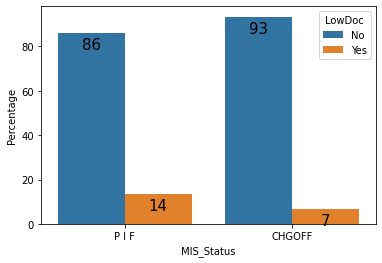

In [43]:
ax4 = sns.barplot(x='MIS_Status', y='Percentage', data=df_ld, hue='LowDoc', ci=None)

for p in ax4.patches:
  ax4.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

Percentage of loan which is using less page application (LowDoc) is lower in population of charged-off- status.

In [44]:
#New Feature from 'FranchiseCode'
df['Is_Franchise'] = df['FranchiseCode'].map(lambda x : 'Yes' if x > 1 else 'No' )
                                      

In [45]:
df_fr1=df.groupby(['MIS_Status','Is_Franchise']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_fr2=df.groupby(['MIS_Status']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_fr = df_fr1.merge(df_fr2, on = 'MIS_Status', how = 'inner')
df_fr = df_fr.rename(columns = {'LoanNr_ChkDgt_x':'Total_Cats', 'LoanNr_ChkDgt_y': 'Total'})
df_fr[['Is_Franchise', 'MIS_Status', 'Total_Cats', 'Total']]
df_fr['Percentage'] = round(df_fr['Total_Cats']/df_fr['Total']*100, 2)
df_fr = df_fr[['Is_Franchise', 'MIS_Status', 'Total_Cats', 'Total', 'Percentage']]
df_fr

,Is_Franchise,MIS_Status,Total_Cats,Total,Percentage
0,No,P I F,672095,714891,94.01
1,Yes,P I F,42796,714891,5.99
2,No,CHGOFF,141071,148766,94.83
3,Yes,CHGOFF,7695,148766,5.17


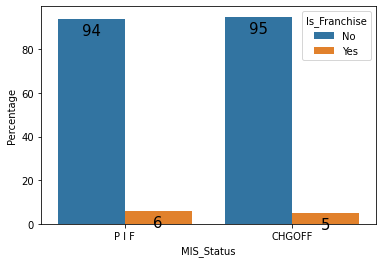

In [46]:
ax5 = sns.barplot(x='MIS_Status', y='Percentage', data=df_fr, hue='Is_Franchise', ci=None)

for p in ax5.patches:
  ax5.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

Only slight difference between percentage of loan which is from franchise business applicant or non-franchise business applicant in each population of charged-off- status and paid in full- status.

In [47]:
#Descriptive Statistic from Numerical Variable based on MIS_Status

In [48]:
df[['Term','NoEmp','CreateJob','RetainedJob','DisbursementGross',
    'BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv','MIS_Status']].groupby('MIS_Status').describe()

Term                                                        \
               count        mean        std  min   25%   50%    75%    max   
MIS_Status                                                                   
CHGOFF      148766.0   57.224332  46.669974  0.0  29.0  49.0   69.0  300.0   
P I F       714891.0  122.066149  79.100284  0.0  78.0  84.0  180.0  300.0   

               NoEmp                                                     \
               count       mean        std  min  25%  50%   75%     max   
MIS_Status                                                                
CHGOFF      148766.0   6.697222  13.993245  0.0  2.0  3.0   7.0  1200.0   
P I F       714891.0  11.357587  25.798273  0.0  2.0  5.0  11.0  1461.0   

           CreateJob                                                     \
               count       mean         std  min  25%  50%  75%     max   
MIS_Status                                                                
CHGOFF      148766.0  15.143467  342.865365  0.0  0.0  0.0  2.0  8800.0   
P I F       714891.0   7.208014  211.535181  0.0  0.0  0.0  1.0  8800.0   

           RetainedJob                                                     \
                 count       mean         std  min  25%  50%  75%     max   
MIS_Status                                                                  
CHGOFF        148766.0  17.690729  343.027964  0.0  0.0  2.0  5.0  8800.0   
P I F         714891.0   9.521235  212.100728  0.0  0.0  0.0  4.0  9500.0   

           DisbursementGross                                                 \
                       count           mean            std     min      25%   
MIS_Status                                                                    
CHGOFF              148766.0  135557.996740  215491.248908  4000.0  28917.0   
P I F               714891.0  215501.430966  294544.155667  4000.0  49473.0   

                                          BalanceGross                         \
                 50%       75%        max        count      mean          std   
MIS_Status                                                                      
CHGOFF       63800.0  145000.0  4362157.0     148766.0  0.000000     0.000000   
P I F       100000.0  255400.0  5000000.0     714891.0  3.683997  1616.569492   

                                         ChgOffPrinGr                \
            min  25%  50%  75%       max        count          mean   
MIS_Status                                                            
CHGOFF      0.0  0.0  0.0  0.0       0.0     148766.0  78258.725065   
P I F       0.0  0.0  0.0  0.0  996262.0     714891.0    136.155338   

                                                                      \
                      std  min      25%      50%      75%        max   
MIS_Status                                                             
CHGOFF      141843.511448  0.0  15644.0  34003.0  77263.0  3512596.0   
P I F         4646.958605  0.0      0.0      0.0      0.0   990516.0   

              GrAppv                                                           \
               count           mean            std     min      25%       50%   
MIS_Status                                                                      
CHGOFF      148766.0  122572.113568  216283.463204  1000.0  25000.0   50000.0   
P I F       714891.0  208338.040122  291497.868033  1000.0  40000.0  100000.0   

                                 SBA_Appv                                \
                 75%        max     count           mean            std   
MIS_Status                                                                
CHGOFF      112000.0  3500000.0  148766.0   86966.164433  159358.902443   
P I F       250000.0  5000000.0  714891.0  163603.903777  237174.724936   

                                                          
              min      25%      50%       75%        max  
MIS_Status                                                
CHGOFF   

In [49]:
print(len(df[df['RetainedJob']>1500]))

648


Choose variable to correlate based on median by MIS_Status

In [50]:
numvar_test=['Term','NoEmp', 'CreateJob', 'DisbursementGross','GrAppv', 'SBA_Appv']

<AxesSubplot:>

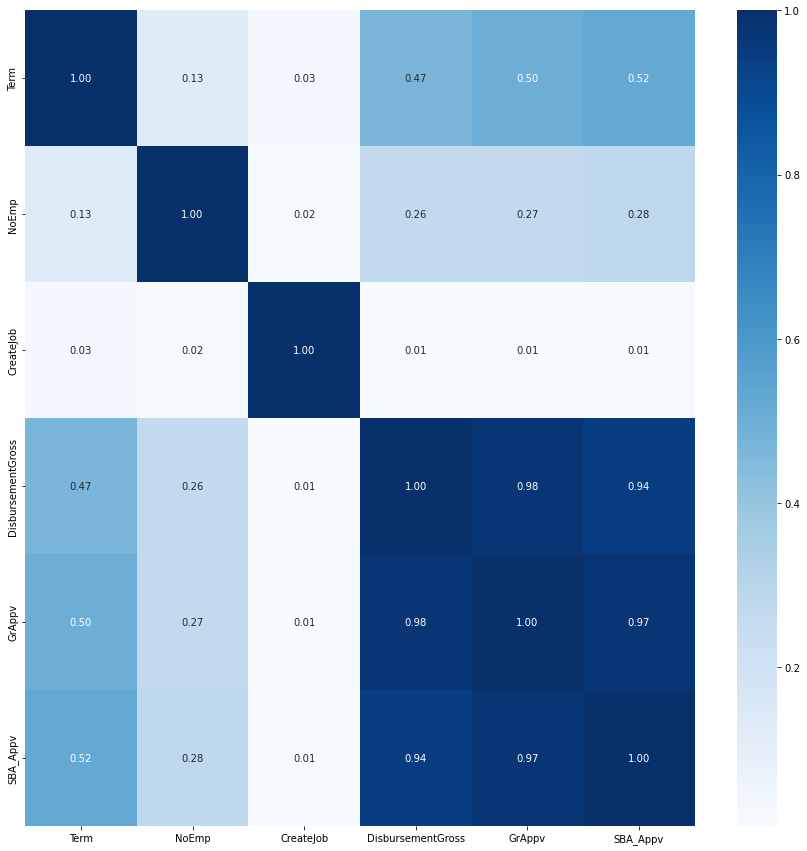

In [51]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[numvar_test].corr(), cmap='Blues', annot=True, fmt='.2f')

### Modelling

In [52]:
!pip install imblearn

In [53]:
!pip install xgboost

In [54]:
!pip install catboost

In [55]:
!pip install lightgbm

In [56]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc,make_scorer, recall_score, accuracy_score, precision_score, f1_score



In [57]:
col_model = [ 'NewExist','UrbanRural','RevLineCr','LowDoc','Is_Franchise', 
              'Term','NoEmp','GrAppv', 'SBA_Appv', 'MIS_Status']
df_model = df[col_model].copy()
df_model.head()

,NewExist,UrbanRural,RevLineCr,LowDoc,Is_Franchise,Term,NoEmp,GrAppv,SBA_Appv,MIS_Status
0,2.0,0,N,Y,No,84,4,60000.0,48000.0,P I F
1,2.0,0,N,Y,No,60,2,40000.0,32000.0,P I F
2,1.0,0,N,N,No,180,7,287000.0,215250.0,P I F
3,1.0,0,N,Y,No,60,2,35000.0,28000.0,P I F
4,1.0,0,N,N,No,240,14,229000.0,229000.0,P I F


In [58]:
df_model['NewExist'] = df_model['NewExist'].map(lambda x : 1 if x == 1 else 0) 
df_model['UrbanRural'] = df_model['UrbanRural'].map(lambda x : 'Undefined' if x == 0 else 
                                        'Urban' if x == 1 else 'Rural')
df_model['RevLineCr'] = df_model['RevLineCr'].map(lambda x : 1 if x == 'Y' else 0)
df_model['LowDoc'] = df_model['LowDoc'].map(lambda x : 1 if x == 'Y' else 0)
df_model['Is_Franchise'] = df_model['Is_Franchise'].map(lambda x : 1 if x == 'Yes' else 0)
df_model['MIS_Status'] = df_model['MIS_Status'].map(lambda x : 1 if x == 'CHGOFF' else 0)

In [59]:
df_model.head()

,NewExist,UrbanRural,RevLineCr,LowDoc,Is_Franchise,Term,NoEmp,GrAppv,SBA_Appv,MIS_Status
0,0,Undefined,0,1,0,84,4,60000.0,48000.0,0
1,0,Undefined,0,1,0,60,2,40000.0,32000.0,0
2,1,Undefined,0,0,0,180,7,287000.0,215250.0,0
3,1,Undefined,0,1,0,60,2,35000.0,28000.0,0
4,1,Undefined,0,0,0,240,14,229000.0,229000.0,0


In [60]:
df_model['MIS_Status'].value_counts()

0    714891
1    148766
Name: MIS_Status, dtype: int64

In [61]:
df_urb = pd.get_dummies(df_model['UrbanRural'], prefix='Urb', drop_first = True)

In [62]:
df_urb

,Urb_Undefined,Urb_Urban
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
899159,1,0
899160,1,0
899161,1,0
899162,1,0


In [63]:
df_model = pd.concat([df_model,df_urb],axis = 1)
df_model

,NewExist,UrbanRural,RevLineCr,LowDoc,Is_Franchise,Term,NoEmp,GrAppv,SBA_Appv,MIS_Status,Urb_Undefined,Urb_Urban
0,0,Undefined,0,1,0,84,4,60000.0,48000.0,0,1,0
1,0,Undefined,0,1,0,60,2,40000.0,32000.0,0,1,0
2,1,Undefined,0,0,0,180,7,287000.0,215250.0,0,1,0
3,1,Undefined,0,1,0,60,2,35000.0,28000.0,0,1,0
4,1,Undefined,0,0,0,240,14,229000.0,229000.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
899159,1,Undefined,0,0,0,60,6,70000.0,56000.0,0,1,0
899160,1,Undefined,1,0,0,60,6,85000.0,42500.0,0,1,0
899161,1,Undefined,0,0,0,108,26,300000.0,225000.0,0,1,0
899162,1,Undefined,0,1,0,60,6,75000.0,60000.0,1,1,0


In [64]:
df_model.drop(['UrbanRural'],axis = 1, inplace = True)
df_model

,NewExist,RevLineCr,LowDoc,Is_Franchise,Term,NoEmp,GrAppv,SBA_Appv,MIS_Status,Urb_Undefined,Urb_Urban
0,0,0,1,0,84,4,60000.0,48000.0,0,1,0
1,0,0,1,0,60,2,40000.0,32000.0,0,1,0
2,1,0,0,0,180,7,287000.0,215250.0,0,1,0
3,1,0,1,0,60,2,35000.0,28000.0,0,1,0
4,1,0,0,0,240,14,229000.0,229000.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
899159,1,0,0,0,60,6,70000.0,56000.0,0,1,0
899160,1,1,0,0,60,6,85000.0,42500.0,0,1,0
899161,1,0,0,0,108,26,300000.0,225000.0,0,1,0
899162,1,0,1,0,60,6,75000.0,60000.0,1,1,0


In [65]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863657 entries, 0 to 899163
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   NewExist       863657 non-null  int64  
 1   RevLineCr      863657 non-null  int64  
 2   LowDoc         863657 non-null  int64  
 3   Is_Franchise   863657 non-null  int64  
 4   Term           863657 non-null  int64  
 5   NoEmp          863657 non-null  int64  
 6   GrAppv         863657 non-null  float64
 7   SBA_Appv       863657 non-null  float64
 8   MIS_Status     863657 non-null  int64  
 9   Urb_Undefined  863657 non-null  uint8  
 10  Urb_Urban      863657 non-null  uint8  
dtypes: float64(2), int64(7), uint8(2)
memory usage: 67.5 MB


#### Splitting the Data

In [66]:
X = df_model.drop('MIS_Status',axis=1).copy()
y = df_model['MIS_Status'].copy()

In [67]:
train_X, test_X, train_y, test_y = train_test_split(X,y,stratify = y, test_size = 0.20, random_state = 42)


#### Comparison of Default Prediction Model

Pipeline architecture : 

1. Scaler

2. with SMOTE 

3. Model Classifier (LogisticRegression, GaussianNB, KNeighborsClassifier,  DecisionTreeClassifier, AdaBoostClassifier, RandomForestClassifier, CatboostClassifier, XGBClassifier, LGBM)



In [68]:
# set weight for class_weight
w = {0:3, 1:11}

##### Logistic Regression

In [69]:
#Using LogisticRegression
pipeline1 = Pipeline( [('scaler', MinMaxScaler ()),
                       ('sampling', SMOTE(random_state = 42 )),
                       ('classifier', LogisticRegression(class_weight=w))
                      ] )
pipeline1.fit(train_X,train_y)
y_pred1 = pipeline1.predict(test_X)
print(classification_report(test_y,y_pred1))
p1_probs = pipeline1.predict_proba(test_X)[:,1]
p1_precision,p1_recall,_ = precision_recall_curve( test_y,p1_probs)

print(auc(p1_recall,p1_precision))

              precision    recall  f1-score   support

           0       0.97      0.31      0.46    142979
           1       0.22      0.96      0.36     29753

    accuracy                           0.42    172732
   macro avg       0.60      0.63      0.41    172732
weighted avg       0.84      0.42      0.45    172732

0.4699253829614728


##### KNeighbors Classifier

In [70]:
#Using KNeighborsClassifier
pipeline2 = Pipeline( [('scaler', MinMaxScaler ()),
                       ('sampling', SMOTE(random_state = 42 )),
                        ('classifier', KNeighborsClassifier())
                       ] )
pipeline2.fit(train_X,train_y)
y_pred2 = pipeline2.predict(test_X)
print(classification_report(test_y,y_pred2))
p2_probs = pipeline2.predict_proba(test_X)[:,1]
p2_precision,p2_recall,_ = precision_recall_curve( test_y,p2_probs)

print(auc(p2_recall,p2_precision))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94    142979
           1       0.68      0.85      0.75     29753

    accuracy                           0.90    172732
   macro avg       0.82      0.88      0.85    172732
weighted avg       0.92      0.90      0.91    172732

0.8023091994300648


##### GaussianNB

In [71]:
#Using GaussianNB
pipeline3 = Pipeline( [('scaler', MinMaxScaler ()),
                       ('sampling', SMOTE(random_state = 42 )),
                        ('classifier', GaussianNB())
                       ] )
pipeline3.fit(train_X,train_y)
y_pred3 = pipeline3.predict(test_X)
print(classification_report(test_y,y_pred3))
p3_probs = pipeline3.predict_proba(test_X)[:,1]
p3_precision,p3_recall,_ = precision_recall_curve( test_y,p3_probs)

print(auc(p3_recall,p3_precision))

              precision    recall  f1-score   support

           0       0.93      0.56      0.70    142979
           1       0.27      0.79      0.40     29753

    accuracy                           0.60    172732
   macro avg       0.60      0.68      0.55    172732
weighted avg       0.81      0.60      0.65    172732

0.3841364566013178


##### Decision Tree Classifier

In [72]:
#Using DecisionTreeClassifier
pipeline4 = Pipeline( [('scaler', MinMaxScaler ()),
                       ('sampling', SMOTE(random_state = 42 )),
                        ('classifier', DecisionTreeClassifier(class_weight=w,random_state=42))
                       ] )
pipeline4.fit(train_X,train_y)
y_pred4 = pipeline4.predict(test_X)
print(classification_report(test_y,y_pred4))
p4_probs = pipeline4.predict_proba(test_X)[:,1]
p4_precision,p4_recall,_ = precision_recall_curve( test_y,p4_probs)

print(auc(p4_recall,p4_precision))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94    142979
           1       0.67      0.79      0.72     29753

    accuracy                           0.90    172732
   macro avg       0.81      0.85      0.83    172732
weighted avg       0.90      0.90      0.90    172732

0.7306657391548206


##### AdaBoost Classifier

In [73]:
#Using AdaBoostClassifier
pipeline5 = Pipeline( [('scaler', MinMaxScaler ()),
                       ('sampling', SMOTE(random_state = 42 )),
                        ('classifier', AdaBoostClassifier(random_state=42))
                       ] )
pipeline5.fit(train_X,train_y)
y_pred5 = pipeline5.predict(test_X)
print(classification_report(test_y,y_pred5))
p5_probs = pipeline5.predict_proba(test_X)[:,1]
p5_precision,p5_recall,_ = precision_recall_curve( test_y,p5_probs)

print(auc(p5_recall,p5_precision))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91    142979
           1       0.55      0.88      0.68     29753

    accuracy                           0.86    172732
   macro avg       0.76      0.87      0.79    172732
weighted avg       0.90      0.86      0.87    172732

0.7005376306738709


##### Random Forest Classifier

In [74]:
#Using RandomForestClassifier
pipeline6 = Pipeline( [('scaler', MinMaxScaler ()),
                        ('sampling', SMOTE(random_state = 42 )),
                        ('classifier', RandomForestClassifier(class_weight=w,random_state=42))
                       ] )
pipeline6.fit(train_X,train_y)
y_pred6 = pipeline6.predict(test_X)
print(classification_report(test_y,y_pred6))
p6_probs = pipeline6.predict_proba(test_X)[:,1]
p6_precision,p6_recall,_ = precision_recall_curve( test_y,p6_probs)

print(auc(p6_recall,p6_precision))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95    142979
           1       0.71      0.81      0.76     29753

    accuracy                           0.91    172732
   macro avg       0.83      0.87      0.85    172732
weighted avg       0.92      0.91      0.91    172732

0.8261311796212337


##### XGBoost Classifier

In [75]:
#Using XGBoost
pipeline7 = Pipeline( [('scaler', MinMaxScaler ()),
                       ('sampling', SMOTE(random_state = 42 )),
                        ('classifier', XGBClassifier())
                       ] )
pipeline7.fit(train_X,train_y)
y_pred7 = pipeline7.predict(test_X)
print(classification_report(test_y,y_pred7))
p7_probs = pipeline7.predict_proba(test_X)[:,1]
p7_precision,p7_recall,_ = precision_recall_curve( test_y,p7_probs)

print(auc(p7_recall,p7_precision))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96    142979
           1       0.78      0.84      0.81     29753

    accuracy                           0.93    172732
   macro avg       0.87      0.90      0.88    172732
weighted avg       0.93      0.93      0.93    172732

0.859001313367948


##### CatBoost Classifier

In [76]:
#Using CatBoost
pipeline8 = Pipeline( [('scaler', MinMaxScaler ()),
                       ('sampling', SMOTE(random_state = 42 )),
                        ('classifier', CatBoostClassifier(class_weights=w,random_state = 42 ))
                       ] )
pipeline8.fit(train_X,train_y)
y_pred8 = pipeline8.predict(test_X)
print(classification_report(test_y,y_pred8))
p8_probs = pipeline8.predict_proba(test_X)[:,1]
p8_precision,p8_recall,_ = precision_recall_curve( test_y,p8_probs)

print(auc(p8_recall,p8_precision))

Learning rate set to 0.208379
0:	learn: 0.5374035	total: 315ms	remaining: 5m 15s
1:	learn: 0.4231780	total: 471ms	remaining: 3m 55s
2:	learn: 0.3726074	total: 618ms	remaining: 3m 25s
3:	learn: 0.3292874	total: 787ms	remaining: 3m 16s
4:	learn: 0.3054439	total: 949ms	remaining: 3m 8s
5:	learn: 0.2887345	total: 1.12s	remaining: 3m 4s
6:	learn: 0.2776349	total: 1.28s	remaining: 3m 1s
7:	learn: 0.2707885	total: 1.44s	remaining: 2m 58s
8:	learn: 0.2667595	total: 1.62s	remaining: 2m 57s
9:	learn: 0.2622113	total: 1.78s	remaining: 2m 55s
10:	learn: 0.2525621	total: 1.95s	remaining: 2m 55s
11:	learn: 0.2485461	total: 2.11s	remaining: 2m 53s
12:	learn: 0.2369220	total: 2.3s	remaining: 2m 54s
13:	learn: 0.2315285	total: 2.51s	remaining: 2m 56s
14:	learn: 0.2274506	total: 2.67s	remaining: 2m 55s
15:	learn: 0.2248361	total: 2.85s	remaining: 2m 55s
16:	learn: 0.2215507	total: 3.02s	remaining: 2m 54s
17:	learn: 0.2198119	total: 3.18s	remaining: 2m 53s
18:	learn: 0.2135227	total: 3.37s	remaining: 2m 

##### LGBM Classifier

In [77]:
#Using LGBM
pipeline9 = Pipeline( [('scaler', MinMaxScaler ()),
                       ('sampling', SMOTE(random_state = 42 )),
                        ('classifier', LGBMClassifier(class_weight=w,random_state = 42 ))
                       ] )
pipeline9.fit(train_X,train_y)
y_pred9 = pipeline9.predict(test_X)
print(classification_report(test_y,y_pred9))
p9_probs = pipeline9.predict_proba(test_X)[:,1]
p9_precision,p9_recall,_ = precision_recall_curve( test_y,p9_probs)

print(auc(p9_recall,p9_precision))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91    142979
           1       0.57      0.94      0.71     29753

    accuracy                           0.87    172732
   macro avg       0.78      0.90      0.81    172732
weighted avg       0.91      0.87      0.88    172732

0.8440289172326516


#### Check Model Performance by Using only 5 Feature 

Feature importance will be made based on only the best default model, which is Pipeline 8 (Catboost)

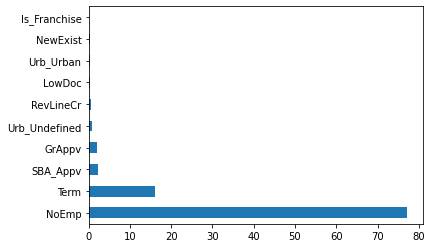

In [79]:
feat_importance = pd.Series(pipeline8.named_steps['classifier'].get_feature_importance(),index=train_X.columns)

feat_importance.nlargest(20).plot(kind='barh')
plt.show()

Choosing variable based on feature importance, setting into new splitting test and training

In [80]:
X1 = df_model.drop(['MIS_Status','Is_Franchise','NewExist','Urb_Urban','LowDoc','Urb_Undefined'],axis=1).copy()
y1 = df_model['MIS_Status'].copy()

In [81]:
train_X1, test_X1, train_y1, test_y1 = train_test_split(X1,y1,stratify = y, test_size = 0.20, random_state = 42)

In [174]:
param_grid2 = {
     'classifier__depth': [8, 9],
     'classifier__iterations': [800, 1000],
     'classifier__learning_rate': [0.05, 0.1, 0.15] 
                          }

In [175]:
from sklearn.metrics import fbeta_score

In [176]:
f1_beta=make_scorer(fbeta_score, beta=2)

In [177]:
gscv_classifier2 = GridSearchCV(pipeline8, param_grid2, cv=5, scoring=f1_beta, n_jobs=-1)

In [178]:
gscv_classifier2.fit(train_X1, train_y1)

0:	learn: 0.5607685	total: 225ms	remaining: 3m 45s
1:	learn: 0.4788184	total: 397ms	remaining: 3m 17s
2:	learn: 0.4096121	total: 591ms	remaining: 3m 16s
3:	learn: 0.3636968	total: 790ms	remaining: 3m 16s
4:	learn: 0.3380273	total: 979ms	remaining: 3m 14s
5:	learn: 0.3155905	total: 1.2s	remaining: 3m 18s
6:	learn: 0.3036657	total: 1.37s	remaining: 3m 14s
7:	learn: 0.2914867	total: 1.6s	remaining: 3m 18s
8:	learn: 0.2842445	total: 1.78s	remaining: 3m 16s
9:	learn: 0.2760147	total: 2.01s	remaining: 3m 18s
10:	learn: 0.2675724	total: 2.21s	remaining: 3m 18s
11:	learn: 0.2629139	total: 2.41s	remaining: 3m 18s
12:	learn: 0.2583104	total: 2.6s	remaining: 3m 17s
13:	learn: 0.2557507	total: 2.77s	remaining: 3m 14s
14:	learn: 0.2526781	total: 2.96s	remaining: 3m 14s
15:	learn: 0.2442119	total: 3.18s	remaining: 3m 15s
16:	learn: 0.2415515	total: 3.41s	remaining: 3m 16s
17:	learn: 0.2387717	total: 3.63s	remaining: 3m 17s
18:	learn: 0.2371506	total: 3.83s	remaining: 3m 17s
19:	learn: 0.2340399	tota

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('sampling', SMOTE(random_state=42)),
                                       ('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x0000021512831820>)]),
             n_jobs=-1,
             param_grid={'classifier__depth': [8, 9],
                         'classifier__iterations': [800, 1000],
                         'classifier__learning_rate': [0.05, 0.1, 0.15]},
             scoring=make_scorer(fbeta_score, beta=2))

In [179]:
result_gscv2 = pd.DataFrame(gscv_classifier2.cv_results_)

In [180]:
print("best parameter : ",gscv_classifier2.best_params_)

best parameter :  {'classifier__depth': 8, 'classifier__iterations': 1000, 'classifier__learning_rate': 0.15}


In [196]:
result_gscv2[['param_classifier__depth','param_classifier__iterations',
                 'param_classifier__learning_rate',
                 'mean_test_score']].sort_values('mean_test_score',ascending = False).head()


,param_classifier__depth,param_classifier__iterations,param_classifier__learning_rate,mean_test_score
5,8,1000,0.15,0.838468
11,9,1000,0.15,0.838431
8,9,800,0.15,0.838323
10,9,1000,0.1,0.838155
2,8,800,0.15,0.837773


#### Hyperparameter Tuning

In [181]:
#Using CatBoost with Hyperparameter Tuning
pipeline8c = Pipeline( [('scaler', MinMaxScaler ()),
                         ('sampling', SMOTE(random_state = 42 )),
                          ('classifier', CatBoostClassifier(class_weights=w,random_state = 42, 
                                                            depth = 8, iterations = 1000, 
                                                            learning_rate = 0.15))
                         ] )
pipeline8c.fit(train_X1,train_y1)
y_pred8c = pipeline8c.predict(test_X1)
print(classification_report(test_y1,y_pred8c))
p8c_probs = pipeline8c.predict_proba(test_X1)[:,1]
p8c_precision,p8c_recall,_ = precision_recall_curve( test_y1,p8c_probs)

print(auc(p8c_recall,p8c_precision))

0:	learn: 0.5607685	total: 168ms	remaining: 2m 48s
1:	learn: 0.4788184	total: 315ms	remaining: 2m 37s
2:	learn: 0.4096121	total: 503ms	remaining: 2m 47s
3:	learn: 0.3636968	total: 715ms	remaining: 2m 57s
4:	learn: 0.3380273	total: 874ms	remaining: 2m 53s
5:	learn: 0.3155905	total: 1.06s	remaining: 2m 55s
6:	learn: 0.3036657	total: 1.19s	remaining: 2m 49s
7:	learn: 0.2914867	total: 1.37s	remaining: 2m 50s
8:	learn: 0.2842445	total: 1.52s	remaining: 2m 47s
9:	learn: 0.2760147	total: 1.69s	remaining: 2m 47s
10:	learn: 0.2675724	total: 1.86s	remaining: 2m 47s
11:	learn: 0.2629139	total: 2.03s	remaining: 2m 47s
12:	learn: 0.2583104	total: 2.19s	remaining: 2m 45s
13:	learn: 0.2557507	total: 2.33s	remaining: 2m 44s
14:	learn: 0.2526781	total: 2.47s	remaining: 2m 42s
15:	learn: 0.2442119	total: 2.65s	remaining: 2m 43s
16:	learn: 0.2415515	total: 2.82s	remaining: 2m 43s
17:	learn: 0.2387717	total: 3s	remaining: 2m 43s
18:	learn: 0.2371506	total: 3.15s	remaining: 2m 42s
19:	learn: 0.2340399	tota

In [109]:
result_gscv = pd.DataFrame(gscv_classifier.cv_results_)

In [110]:
print("best parameter : ",gscv_classifier.best_params_)

best parameter :  {'classifier__depth': 9, 'classifier__iterations': 800, 'classifier__l2_leaf_reg': 5, 'classifier__learning_rate': 0.12}


In [111]:
result_gscv[['param_classifier__depth','param_classifier__iterations',
                 'param_classifier__l2_leaf_reg','param_classifier__learning_rate',
                 'mean_test_score']].sort_values('mean_test_score',ascending = False).head()


,param_classifier__depth,param_classifier__iterations,param_classifier__l2_leaf_reg,param_classifier__learning_rate,mean_test_score
52,9,800,5,0.12,0.960512
35,8,800,5,0.18,0.960471
49,9,800,3,0.12,0.960450
17,7,800,5,0.18,0.960427
47,9,600,5,0.18,0.960414


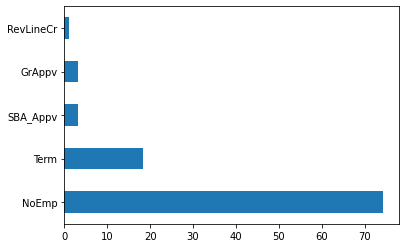

In [193]:
feats_importance = pd.Series(pipeline8c.named_steps['classifier'].get_feature_importance(),index=train_X1.columns)
feats_importance.nlargest(20).plot(kind='barh')
plt.show()

### Conclusion

The Best AUC score from this dataset is obtained from CatBoost Classifier. 

Top 5 variables in building the model are 'Term', 'NoEmp', 'SBA_Appv', 'GrAppv', 'RevLineCr'.

There's chance in improving model by adjusting threshold.